In [2]:
import json
import pandas as pd

In [3]:
pref_path = "judge/result/meta-llama-Llama-3.3-70B-Instruct/preference/en_correct_zh_cn_correct.jsonl"
en_path = "judge/result/meta-llama-Llama-3.3-70B-Instruct/perplexity/en_correct.jsonl"
zh_path = "judge/result/meta-llama-Llama-3.3-70B-Instruct/perplexity/zh_cn_correct.jsonl"

In [ ]:
def read_jsonl(path):
    with open(path, "r", encoding="utf-8") as f:
        return [json.loads(line) for line in f if line.strip()]

pref_dicts = read_jsonl(pref_path)
en_dicts = read_jsonl(en_path)
zh_dicts = read_jsonl(zh_path)

# Maps keyed by 'index'
pref_by_index = {d['index']: d for d in pref_dicts}

In [27]:
zh

{'index': 783,
 'perplexity': {'Err': 'Could not find answer tokens in input_ids by backward search'},
 'question': 'Which of the following is typically NOT found in normal somatic cells of a human male?',
 'answer': ' 一个失活的 X 染色体',
 'lang': 'zh_cn',
 'is_correct': True,
 'subject': 'college_biology'}

In [ ]:
samples = []

for en,zh in zip(en_dicts, zh_dicts):
    print(en)
    pref = pref_by_index[en['index']]
    try:
        samples.append({
            'preference': pref['preference']['Ok']['preferred_answer'],
            'zh_perplexity': zh['perplexity']['Ok'],
            'en_perplexity': en['perplexity']['Ok'],
        })
    except:
        pass

{'index': 3, 'perplexity': {'Ok': 16.913717}, 'question': 'Statement 1 | A factor group of a non-Abelian group is non-Abelian. Statement 2 | If K is a normal subgroup of H and H is a normal subgroup of G, then K is a normal subgroup of G.', 'answer': 'False, False', 'lang': 'en', 'is_correct': True, 'subject': 'abstract_algebra'}
{'index': 5, 'perplexity': {'Ok': 143.84697}, 'question': 'Statement 1 | If a group has an element of order 15 it must have at least 8 elements of order 15. Statement 2 | If a group has more than 8 elements of order 15, it must have at least 16 elements of order 15.', 'answer': 'True, True', 'lang': 'en', 'is_correct': True, 'subject': 'abstract_algebra'}
{'index': 6, 'perplexity': {'Ok': 443.07983}, 'question': 'Statement 1 | Every homomorphic image of a group G is isomorphic to a factor group of G. Statement 2 | The homomorphic images of a group G are the same (up to isomorphism) as the factor groups of G.', 'answer': 'True, True', 'lang': 'en', 'is_correct'

KeyError: 'Ok'

for perplexity diff within [-19.25, -15.833333333333334]
winrate = 0 / 78 = 0.0

for perplexity diff within [-15.833333333333334, -12.416666666666668]
winrate = 0 / 1016 = 0.0

for perplexity diff within [-12.416666666666668, -9.0]
winrate = 0 / 1820 = 0.0

for perplexity diff within [-9.0, -5.583333333333334]
winrate = 0 / 2399 = 0.0

for perplexity diff within [-5.583333333333334, -2.166666666666668]
winrate = 0 / 2916 = 0.0

for perplexity diff within [-2.166666666666668, 1.25]
winrate = 877 / 2382 = 0.3681780016792611

for perplexity diff within [1.25, 4.666666666666664]
winrate = 2682 / 2682 = 1.0

for perplexity diff within [4.666666666666664, 8.083333333333332]
winrate = 3277 / 3277 = 1.0

for perplexity diff within [8.083333333333332, 11.5]
winrate = 2953 / 2953 = 1.0

for perplexity diff within [11.5, 14.916666666666664]
winrate = 2630 / 2630 = 1.0

for perplexity diff within [14.916666666666664, 18.33333333333333]
winrate = 747 / 747 = 1.0

for perplexity diff within [18.3333

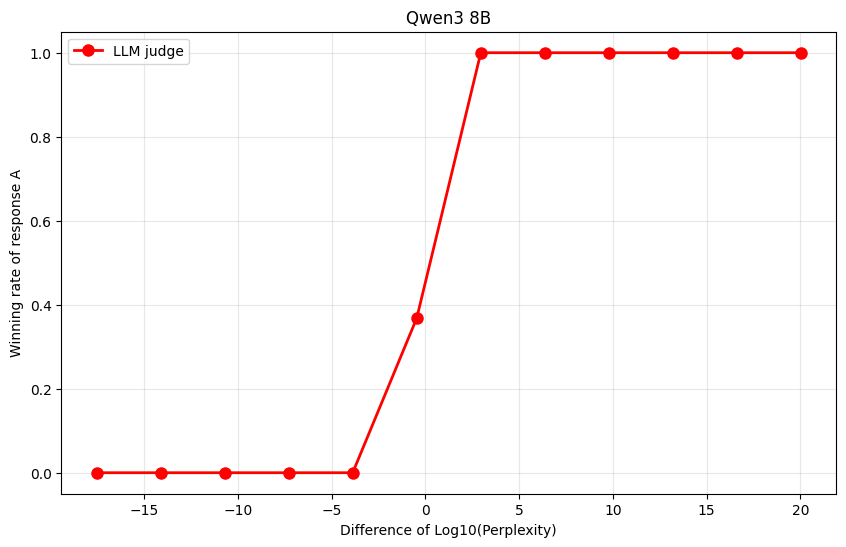

In [27]:
import numpy as np

import matplotlib.pyplot as plt

logprob_diffs = []
win_rates = []

# Calculate min and max values from the data
logprob_values = [obj.preference['Ok']['logprob_signed_difference'] for obj in objects]
min_val = min(logprob_values)
max_val = max(logprob_values)

# Create 12 bins dynamically based on data range
bins = np.linspace(min_val, max_val, 13)  # 13 edges for 12 bins
bin_centers = (bins[:-1] + bins[1:]) / 2

for i in range(len(bins) - 1):
    bin_start, bin_end = bins[i], bins[i + 1]
    items_in_bin = [obj for obj in objects 
                    if bin_start <= obj.preference['Ok']['logprob_signed_difference'] < bin_end]
    
    if items_in_bin:
        # Calculate win rate (preferred_answer == 1)
        wins = sum(1 for obj in items_in_bin if obj.preference['Ok']['preferred_answer'] == 1)
        win_rate = wins / len(items_in_bin)
        print(f'for perplexity diff within [{bin_start}, {bin_end}]\nwinrate = {wins} / {len(items_in_bin)} = {win_rate}\n')
        logprob_diffs.append(bin_centers[i])
        win_rates.append(win_rate)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(logprob_diffs, win_rates, marker='o', linewidth=2, markersize=8, color='red', label='LLM judge')
plt.xlabel('Difference of Log10(Perplexity)')
plt.ylabel('Winning rate of response A')
plt.title('Qwen3 8B')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()